In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('alcohol-consumption-in-russia.csv')
data_duplicate = data
data.head()

year              region  wine  beer  vodka  champagne  brandy
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'wine'}>],
       [<AxesSubplot:title={'center':'beer'}>,
        <AxesSubplot:title={'center':'vodka'}>],
       [<AxesSubplot:title={'center':'champagne'}>,
        <AxesSubplot:title={'center':'brandy'}>]], dtype=object)

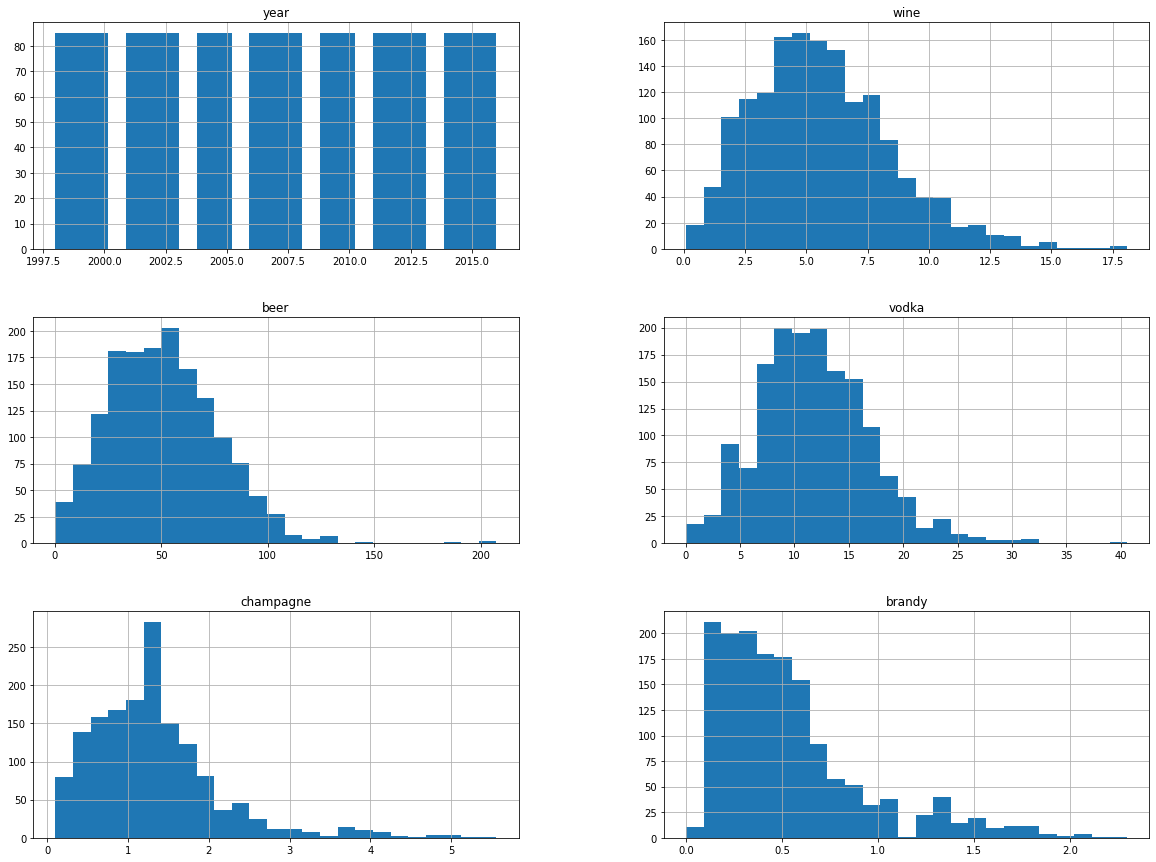

In [4]:
data.hist(bins = 25, figsize = (20,15))

In [46]:
total_null = alc_data.isnull().sum().sort_values(ascending = False)
percent_null = (alc_data.isnull().sum()/alc_data.isnull().count()).sort_values(ascending = False)
null_df = pd.concat([total_null,percent_null],axis = 1,keys = ['Total','Percent'])
null_df

NameError: name 'alc_data' is not defined

In [5]:
print('The number of missing values in each column: ')
data.isna().sum()

The number of missing values in each column: 


year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

<AxesSubplot:>

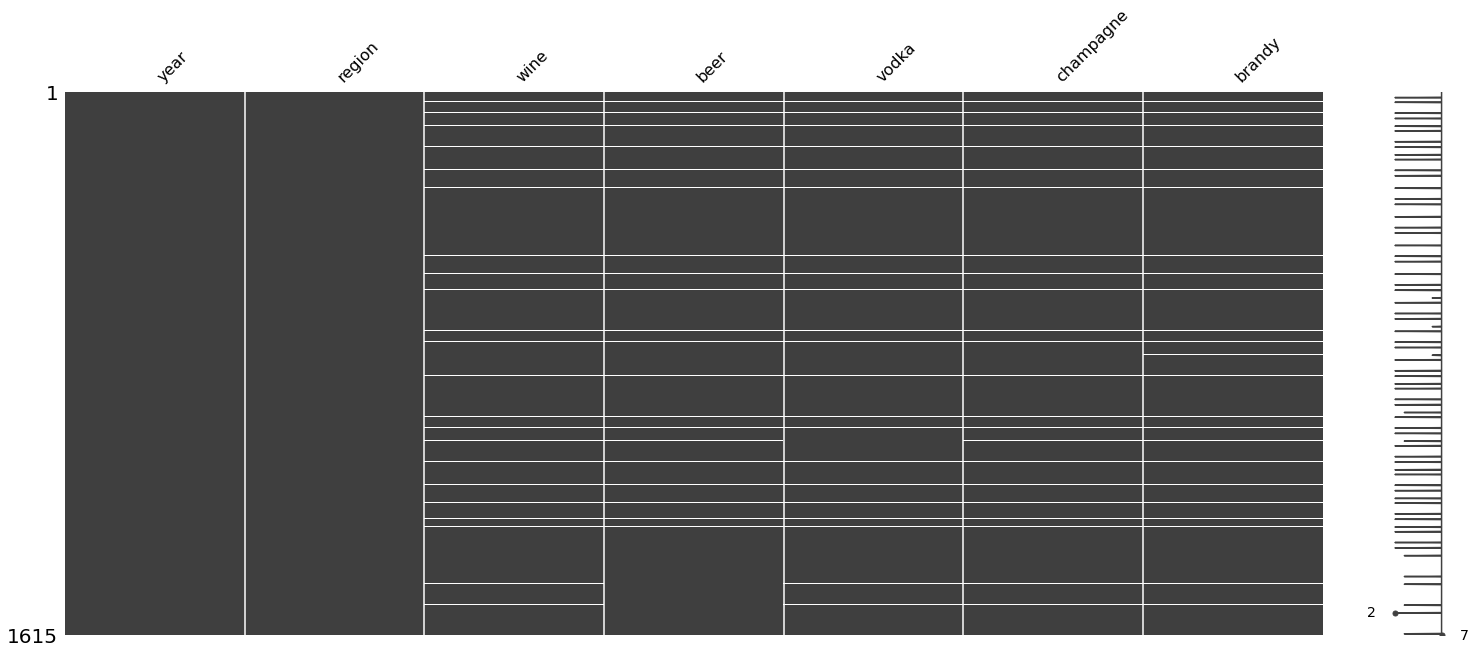

In [6]:
msno.matrix(data)


<AxesSubplot:>

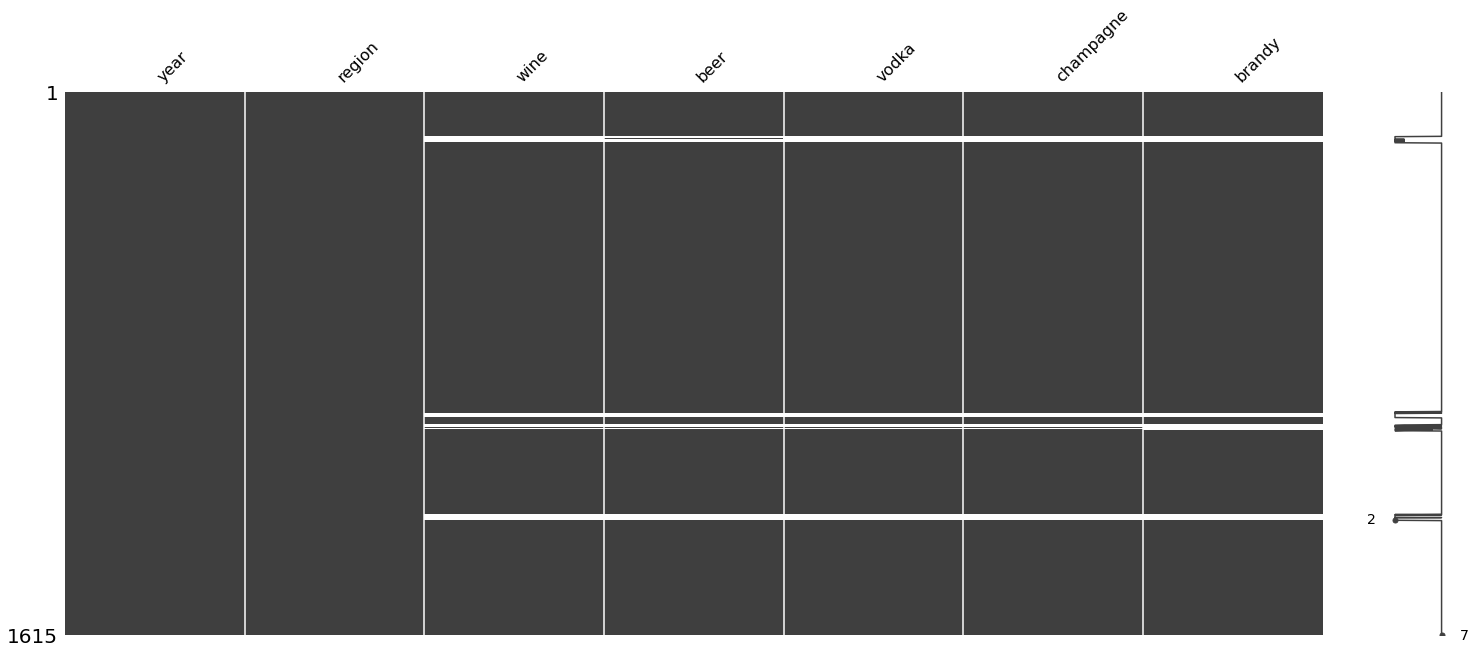

In [7]:
msno.matrix(data.sort_values(['region']))

In [8]:
#List the countries that have missing values.
data_sorted = data.sort_values(['region', 'year'])
data_na = data_sorted[data_sorted['brandy'].isna()]
print(data_na.groupby('region')['region'].unique())
data_na


region
Chechen Republic                [Chechen Republic]
Republic of Crimea            [Republic of Crimea]
Republic of Ingushetia    [Republic of Ingushetia]
Sevastopol                            [Sevastopol]
Name: region, dtype: object


year            region  wine  beer  vodka  champagne  brandy
79    1998  Chechen Republic   NaN   NaN    NaN        NaN     NaN
164   1999  Chechen Republic   NaN   NaN    NaN        NaN     NaN
249   2000  Chechen Republic   NaN   NaN    NaN        NaN     NaN
334   2001  Chechen Republic   NaN   NaN    NaN        NaN     NaN
419   2002  Chechen Republic   NaN   NaN    NaN        NaN     NaN
...    ...               ...   ...   ...    ...        ...     ...
998   2009        Sevastopol   NaN   NaN    NaN        NaN     NaN
1083  2010        Sevastopol   NaN   NaN    NaN        NaN     NaN
1168  2011        Sevastopol   NaN   NaN    NaN        NaN     NaN
1253  2012        Sevastopol   NaN   NaN    NaN        NaN     NaN
1338  2013        Sevastopol   NaN   NaN    NaN        NaN     NaN

[66 rows x 7 columns]

In [9]:
data_recent = data_duplicate.copy()
data_recent = data_recent[(data_recent['year']>=2014)& (data_recent['year']<=2016)]
data_recent[data_recent['brandy'].isna()]

year                  region  wine  beer  vodka  champagne  brandy
1377  2014  Republic of Ingushetia   NaN   0.4    NaN        NaN     NaN
1439  2014        Chechen Republic   NaN   4.9    NaN        NaN     NaN
1462  2015  Republic of Ingushetia   NaN   0.5    NaN        NaN     NaN
1524  2015        Chechen Republic   NaN   2.2    NaN        NaN     NaN
1547  2016  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
1609  2016        Chechen Republic   NaN   1.2    NaN        NaN     NaN

In [10]:
#No reason to keep Republic of Ingushetia or Chechen Republic due to having mostly missing values from 2014-2016
data_recent = data_recent[(data_recent['region'] != 'Republic of Ingushetia') & (data_recent['region'] != 'Chechen Republic')]
data_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 1360 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       249 non-null    int64  
 1   region     249 non-null    object 
 2   wine       249 non-null    float64
 3   beer       249 non-null    float64
 4   vodka      249 non-null    float64
 5   champagne  249 non-null    float64
 6   brandy     249 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


We have not dealt with the missing values for the data that was collected 1998-2013. However, the second table, data_recent, no longer has missing values. We will normalize the data for wine to ensure its maximum value is 1.

In [11]:
#Gets a list of all the unique region values
region_list = data['region'].unique()

for region in region_list:
    mean_num = data.loc[data['region'] == region, 'wine'].mean() 
    data.loc[data['region'] == region] = data.loc[data['region'] == region].fillna({'wine':mean_num})
    
#Just in case we need this for the future
data_sales = data.copy()


#Now we want to normalize the wine sales, so that each region is in the same range.
#(i.e. we want the max value in the wine column to be 1 for each reigon)
for region in region_list:
    max_num = data.loc[data['region']==region,'wine'].max()
    data.loc[data['region']==region,'wine'] = (data.loc[data['region']==region,'wine'] / max_num).round(3)

#Checks to ensure the above loop properly normalizes the wine column
print(data['wine'].max())

1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1596 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [13]:
data[data['wine'].isna()]

year            region  wine  beer  vodka  champagne  brandy
79    1998  Chechen Republic   NaN   NaN    NaN        NaN     NaN
164   1999  Chechen Republic   NaN   NaN    NaN        NaN     NaN
249   2000  Chechen Republic   NaN   NaN    NaN        NaN     NaN
334   2001  Chechen Republic   NaN   NaN    NaN        NaN     NaN
419   2002  Chechen Republic   NaN   NaN    NaN        NaN     NaN
504   2003  Chechen Republic   NaN   NaN    NaN        NaN     NaN
589   2004  Chechen Republic   NaN   NaN    NaN        NaN     NaN
674   2005  Chechen Republic   NaN   NaN    NaN        NaN     NaN
759   2006  Chechen Republic   NaN   NaN    NaN        NaN     NaN
844   2007  Chechen Republic   NaN   NaN    NaN        NaN     NaN
929   2008  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1014  2009  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1099  2010  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1184  2011  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1269  2012  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1354  2013  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1439  2014  Chechen Republic   NaN   4.9    NaN        NaN     NaN
1524  2015  Chechen Republic   NaN   2.2    NaN        NaN     NaN
1609  2016  Chechen Republic   NaN   1.2    NaN        NaN     NaN

In [14]:
data.dropna(subset=['wine'],inplace = True)
data = data.drop(['beer', 'vodka', 'champagne', 'brandy'], axis=1)
data.isna().sum()

year      0
region    0
wine      0
dtype: int64

In [15]:
data.head()

year              region   wine
0  1998  Republic of Adygea  0.279
1  1998          Altai Krai  0.688
2  1998         Amur Oblast  0.276
3  1998  Arkhangelsk Oblast  0.352
4  1998    Astrakhan Oblast  0.475

In [16]:
data_recent.head()

year              region  wine  beer  vodka  champagne  brandy
1360  2014  Republic of Adygea   3.7  28.7    4.1        1.5     0.7
1361  2014          Altai Krai   4.1  52.5    5.5        1.0     0.3
1362  2014         Amur Oblast   6.1  64.0    8.3        1.8     0.6
1363  2014  Arkhangelsk Oblast  10.7  64.4   12.8        2.0     1.0
1364  2014    Astrakhan Oblast   5.1  62.9    5.8        1.0     0.7

In [17]:
#Pivot table of data where region is the iandex and year is the column
data_pivot = data.pivot_table(index = 'region',columns = 'year',values = 'wine')
data_pivot.head()

year                 1998   1999   2000   2001   2002   2003   2004   2005  \
region                                                                       
Altai Krai          0.688  0.458  0.438  0.479  0.333  0.354  0.417  0.417   
Altai Republic      0.507  0.716  0.806  0.851  0.851  0.955  1.000  0.896   
Amur Oblast         0.276  0.382  0.316  0.342  0.303  0.697  0.684  0.763   
Arkhangelsk Oblast  0.352  0.376  0.450  0.572  0.662  0.752  0.572  0.621   
Astrakhan Oblast    0.475  0.623  0.607  0.623  0.672  0.738  0.787  0.689   

year                 2006   2007   2008   2009   2010   2011   2012   2013  \
region                                                                       
Altai Krai          0.458  0.521  0.729  0.792  0.854  0.940  1.000  0.917   
Altai Republic      0.597  0.716  0.896  0.821  0.910  0.852  0.776  0.627   
Amur Oblast         0.776  0.750  0.855  0.908  1.000  0.949  0.763  0.882   
Arkhangelsk Oblast  0.703  0.826  0.875  0.924  0.981  1.000  0.752  0.752   
Astrakhan Oblast    0.639  0.672  0.820  0.967  1.000  0.807  0.770  0.689   

year                 2014   2015   2016  
region                                   
Altai Krai          0.854  0.917  1.000  
Altai Republic      0.627  0.642  0.672  
Amur Oblast         0.803  0.789  0.816  
Arkhangelsk Oblast  0.875  0.736  0.687  
Astrakhan Oblast    0.836  0.770  0.738

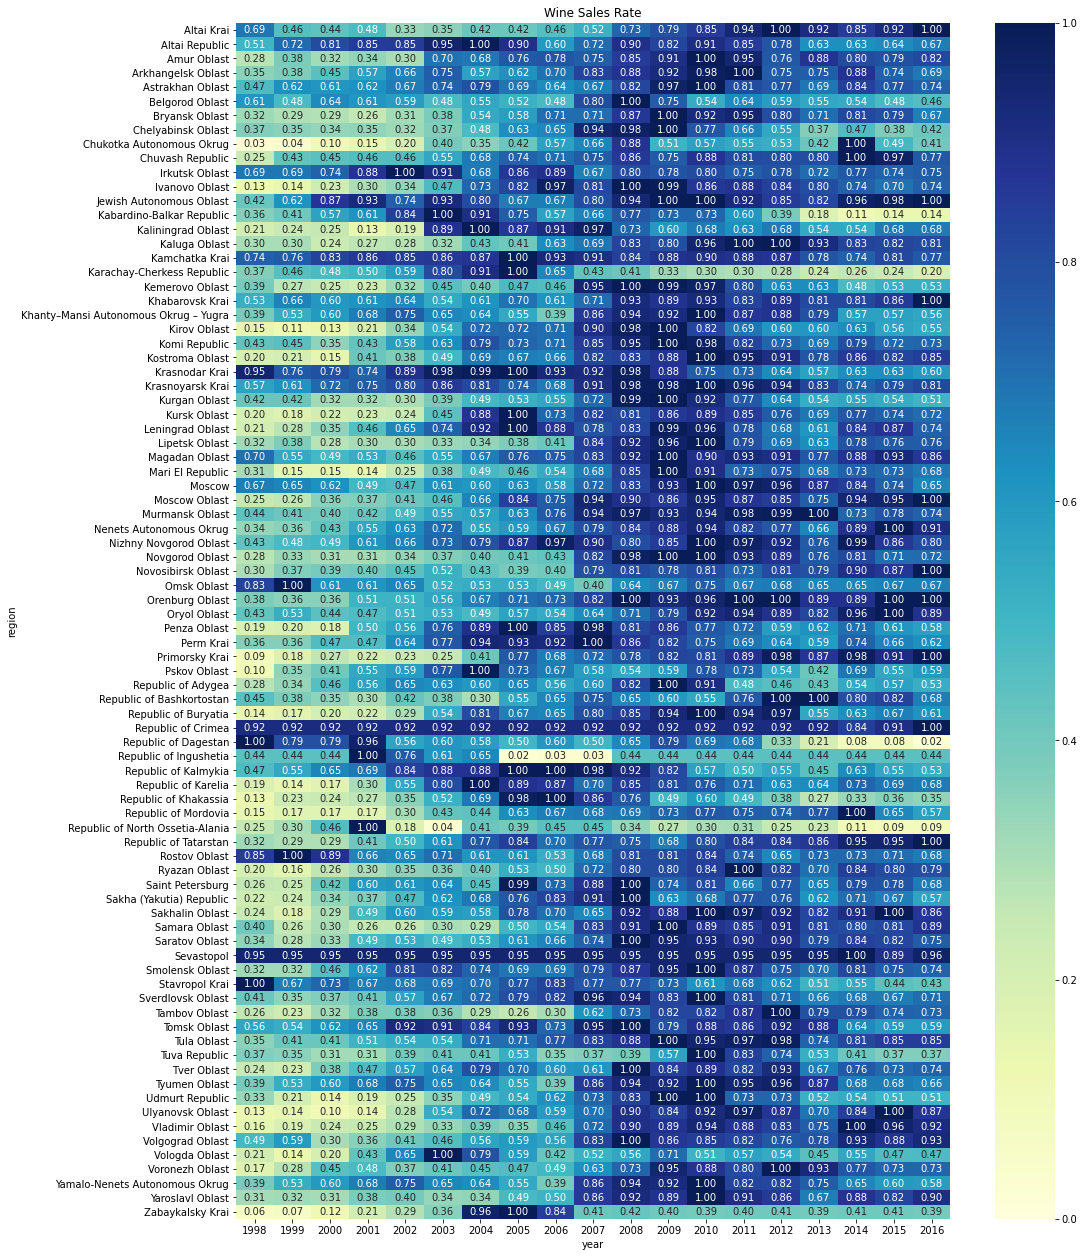

In [18]:
#Now we will make a heatmap, whcih will give the general trend in relative magnitude of wine sales.
plt.subplots(figsize=(16, 22))
ax = sns.heatmap(data_pivot, annot=True, fmt='.2f', vmin = 0.0, vmax = 1.0, cmap='YlGnBu')
plt.title('Wine Sales Rate')
plt.show()

There is a lot to take in just back looking at this graph. The dark red, implies the region is hitting it's max value of wine sales for that specific region. Scanning through it, I am intrested in the trend for region Republic of Tatarstan and Novosibirsk Oblast.

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [20]:
data_pivot

year                             1998   1999   2000   2001   2002   2003  \
region                                                                     
Altai Krai                      0.688  0.458  0.438  0.479  0.333  0.354   
Altai Republic                  0.507  0.716  0.806  0.851  0.851  0.955   
Amur Oblast                     0.276  0.382  0.316  0.342  0.303  0.697   
Arkhangelsk Oblast              0.352  0.376  0.450  0.572  0.662  0.752   
Astrakhan Oblast                0.475  0.623  0.607  0.623  0.672  0.738   
...                               ...    ...    ...    ...    ...    ...   
Vologda Oblast                  0.215  0.138  0.204  0.431  0.646  1.000   
Voronezh Oblast                 0.173  0.280  0.453  0.480  0.373  0.413   
Yamalo-Nenets Autonomous Okrug  0.390  0.532  0.597  0.675  0.753  0.649   
Yaroslavl Oblast                0.310  0.319  0.310  0.381  0.398  0.336   
Zabaykalsky Krai                0.055  0.067  0.117  0.215  0.288  0.362   

year                             2004   2005   2006   2007   2008   2009  \
region                                                                     
Altai Krai                      0.417  0.417  0.458  0.521  0.729  0.792   
Altai Republic                  1.000  0.896  0.597  0.716  0.896  0.821   
Amur Oblast                     0.684  0.763  0.776  0.750  0.855  0.908   
Arkhangelsk Oblast              0.572  0.621  0.703  0.826  0.875  0.924   
Astrakhan Oblast                0.787  0.689  0.639  0.672  0.820  0.967   
...                               ...    ...    ...    ...    ...    ...   
Vologda Oblast                  0.785  0.586  0.425  0.519  0.558  0.713   
Voronezh Oblast                 0.453  0.467  0.493  0.627  0.733  0.947   
Yamalo-Nenets Autonomous Okrug  0.636  0.545  0.390  0.857  0.935  0.922   
Yaroslavl Oblast                0.345  0.487  0.504  0.858  0.920  0.885   
Zabaykalsky Krai                0.963  1.000  0.840  0.411  0.423  0.399   

year                             2010   2011   2012   2013   2014   2015  \
region                                                                     
Altai Krai                      0.854  0.940  1.000  0.917  0.854  0.917   
Altai Republic                  0.910  0.852  0.776  0.627  0.627  0.642   
Amur Oblast                     1.000  0.949  0.763  0.882  0.803  0.789   
Arkhangelsk Oblast              0.981  1.000  0.752  0.752  0.875  0.736   
Astrakhan Oblast                1.000  0.807  0.770  0.689  0.836  0.770   
...                               ...    ...    ...    ...    ...    ...   
Vologda Oblast                  0.508  0.571  0.541  0.453  0.552  0.470   
Voronezh Oblast                 0.880  0.803  1.000  0.933  0.773  0.733   
Yamalo-Nenets Autonomous Okrug  1.000  0.822  0.818  0.753  0.649  0.597   
Yaroslavl Oblast                1.000  0.909  0.858  0.673  0.876  0.823   
Zabaykalsky Krai                0.393  0.400  0.405  0.393  0.405  0.405   

year                             2016  
region                                 
Altai Krai                      1.000  
Altai Republic                  0.672  
Amur Oblast                     0.816  
Arkhangelsk Oblast              0.687  
Astrakhan Oblast                0.738  
...                               ...  
Vologda Oblast                  0.475  
Voronezh Oblast                 0.733  
Yamalo-Nenets Autonomous Okrug  0.584  
Yaroslavl Oblast                0.903  
Zabaykalsky Krai                0.393  

[84 rows x 19 columns]

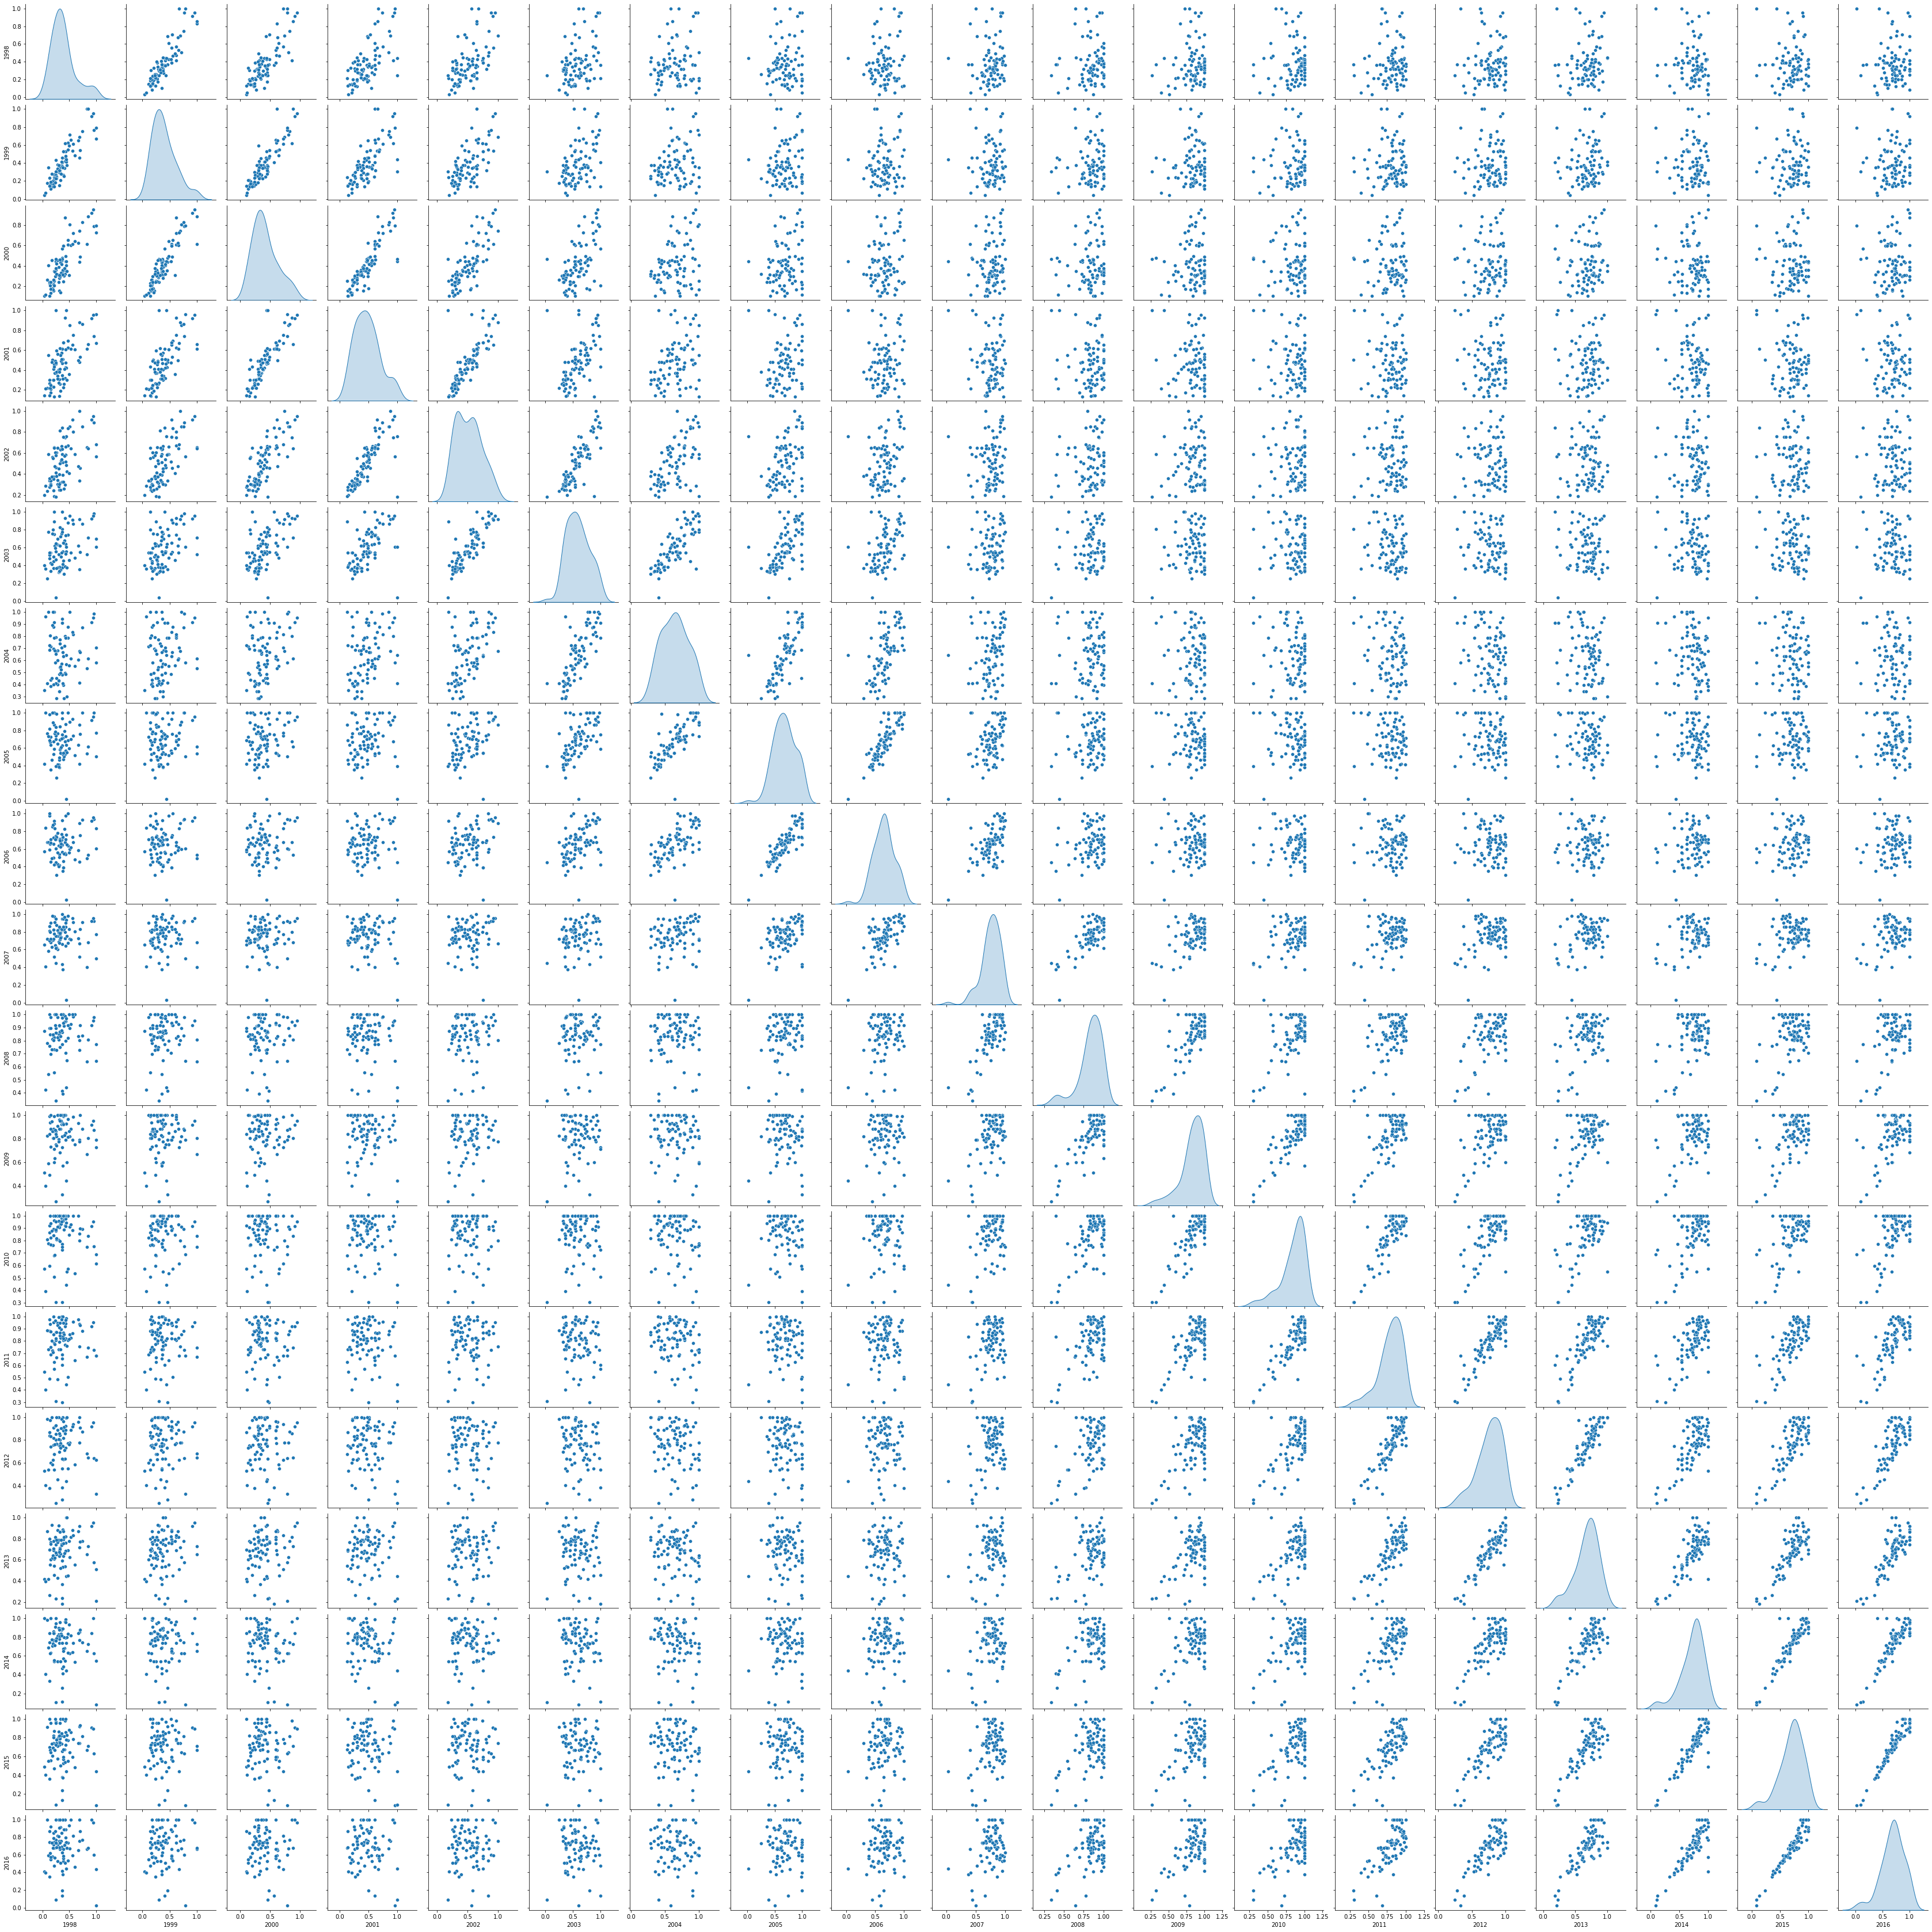

In [21]:
#Visualize the distribution of the sales in different years
sns.pairplot(data_pivot, diag_kind='kde')
plt.show()

In [22]:
#Normalize the table and review the mean and standard deviation of the table
scaler=StandardScaler()
scaler.fit(data_pivot)
pivot_normalized = scaler.transform(data_pivot)
pivot_normalized = pd.DataFrame(data=pivot_normalized, index=data_pivot.index, columns=data_pivot.columns)
pivot_normalized.agg(['mean', 'std']).round()


year  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
mean   0.0  -0.0  -0.0   0.0   0.0   0.0  -0.0   0.0   0.0   0.0  -0.0  -0.0   
std    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

year  2010  2011  2012  2013  2014  2015  2016  
mean  -0.0  -0.0  -0.0   0.0  -0.0  -0.0  -0.0  
std    1.0   1.0   1.0   1.0   1.0   1.0   1.0

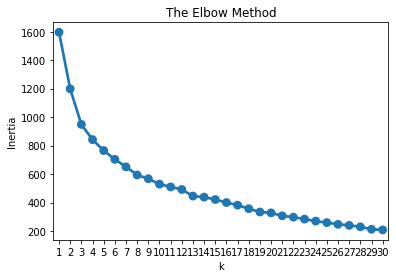

In [23]:
#Visualize the Inertia to choose the point with the sharpest angle.

#The follow dictionary has keys = number of clusters
#the values correspond to the mean inertia for that number of clusters
#inertia (for a given data point) is the squared distance to its closests centeroid
#We are interested in the mean interia for each k
inertia = {}
for k in range(1, 31):
    kmeans = KMeans(n_clusters = k, random_state = 343)
    kmeans.fit(pivot_normalized)
    inertia[k] = kmeans.inertia_

sns.pointplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

The results of the Elbow Method have mean leaning towards either k = 4 or k = 8. Granted k = 13 could be intresting as well. However, for the sake of simplicity, we will use k = 4 and leave the remaining cases up for future analysis. Note, to come up with k = 4,8,13 I simply look athe the steepness of the previous k. The more steep and then a more gradual drop off pinpoint a potential 'optimal' k value.

In [24]:
pivot_normalized

year                                1998      1999      2000      2001  \
region                                                                   
Altai Krai                      1.359558  0.284941  0.081009 -0.010465   
Altai Republic                  0.547732  1.484248  1.851987  1.683887   
Amur Oblast                    -0.488356 -0.068344 -0.506108 -0.634460   
Arkhangelsk Oblast             -0.147479 -0.096235  0.138759  0.413123   
Astrakhan Oblast                0.404204  1.051940  0.894312  0.645413   
...                                  ...       ...       ...       ...   
Vologda Oblast                 -0.761955 -1.202572 -1.045101 -0.229091   
Voronezh Oblast                -0.950334 -0.542489  0.153196 -0.005910   
Yamalo-Nenets Autonomous Okrug  0.022960  0.628928  0.846187  0.882258   
Yaroslavl Oblast               -0.335858 -0.361198 -0.534983 -0.456826   
Zabaykalsky Krai               -1.479591 -1.532614 -1.463784 -1.212908   

year                                2002      2003      2004      2005  \
region                                                                   
Altai Krai                     -0.899863 -1.163503 -1.181908 -1.298602   
Altai Republic                  1.601245  1.777235  1.794100  1.086179   
Amur Oblast                    -1.044715  0.514821  0.181033  0.424016   
Arkhangelsk Oblast              0.688678  0.783941 -0.390688 -0.282954   
Astrakhan Oblast                0.736962  0.715437  0.706811  0.055595   
...                                  ...       ...       ...       ...   
Vologda Oblast                  0.611424  1.997423  0.696602 -0.457207   
Voronezh Oblast                -0.706727 -0.874812 -0.998140 -1.049668   
Yamalo-Nenets Autonomous Okrug  1.128062  0.279954 -0.063990 -0.661333   
Yaroslavl Oblast               -0.586018 -1.251579 -1.549442 -0.950095   
Zabaykalsky Krai               -1.117141 -1.124359  1.605228  1.603960   

year                                2006      2007      2008      2009  \
region                                                                   
Altai Krai                     -1.083750 -1.416816 -0.707485 -0.236345   
Altai Republic                 -0.315732 -0.231795  0.401409 -0.057600   
Amur Oblast                     0.673298 -0.025176  0.129165  0.478634   
Arkhangelsk Oblast              0.269951  0.436678  0.261967  0.577251   
Astrakhan Oblast               -0.083669 -0.499185 -0.103237  0.842287   
...                                  ...       ...       ...       ...   
Vologda Oblast                 -1.266085 -1.428971 -1.842939 -0.723270   
Voronezh Oblast                -0.890364 -0.772651 -0.680924  0.719014   
Yamalo-Nenets Autonomous Okrug -1.459470  0.625066  0.660372  0.564924   
Yaroslavl Oblast               -0.829585  0.631143  0.560771  0.336871   
Zabaykalsky Krai                1.026918 -2.085290 -2.739350 -2.658644   

year                                2010      2011      2012      2013  \
region                                                                   
Altai Krai                      0.056434  0.912592  1.318822  1.299955   
Altai Republic                  0.391195  0.358607  0.089324 -0.277004   
Amur Oblast                     0.929203  0.969250  0.017969  1.109633   
Arkhangelsk Oblast              0.815623  1.290309 -0.042408  0.402720   
Astrakhan Oblast                0.929203  0.075319  0.056391  0.060139   
...                                  ...       ...       ...       ...   
Vologda Oblast                 -2.011908 -1.410370 -1.200551 -1.223179   
Voronezh Oblast                 0.211858  0.050137  1.318822  1.386960   
Yamalo-Nenets Autonomous Okrug  0.929203  0.169748  0.319855  0.408158   
Yaroslavl Oblast                0.929203  0.717438  0.539408 -0.026865   
Zabaykalsky Krai               -2.699363 -2.486864 -1.947031 -1.549446   

year                                2014      2015      2016  
region                                                        
Altai Krai            

In [25]:
kmeans = KMeans(n_clusters=4, random_state=3)
kmeans.fit(pivot_normalized)
cluster_labels = kmeans.labels_

data_cluster = data_pivot.assign(cluster=cluster_labels)
data_cluster = data_cluster.reset_index()
data_cluster.columns.name = None
data_cluster.head()

region   1998   1999   2000   2001   2002   2003   2004   2005  \
0          Altai Krai  0.688  0.458  0.438  0.479  0.333  0.354  0.417  0.417   
1      Altai Republic  0.507  0.716  0.806  0.851  0.851  0.955  1.000  0.896   
2         Amur Oblast  0.276  0.382  0.316  0.342  0.303  0.697  0.684  0.763   
3  Arkhangelsk Oblast  0.352  0.376  0.450  0.572  0.662  0.752  0.572  0.621   
4    Astrakhan Oblast  0.475  0.623  0.607  0.623  0.672  0.738  0.787  0.689   

    2006  ...   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
0  0.458  ...  0.729  0.792  0.854  0.940  1.000  0.917  0.854  0.917  1.000   
1  0.597  ...  0.896  0.821  0.910  0.852  0.776  0.627  0.627  0.642  0.672   
2  0.776  ...  0.855  0.908  1.000  0.949  0.763  0.882  0.803  0.789  0.816   
3  0.703  ...  0.875  0.924  0.981  1.000  0.752  0.752  0.875  0.736  0.687   
4  0.639  ...  0.820  0.967  1.000  0.807  0.770  0.689  0.836  0.770  0.738   

   cluster  
0        2  
1        1  
2        2  
3        1  
4        1  

[5 rows x 21 columns]

In [26]:
data_cluster[data_cluster['region'] == 'Saint Petersburg']

region  1998  1999   2000   2001   2002   2003   2004  2005  \
60  Saint Petersburg  0.26  0.25  0.423  0.596  0.606  0.635  0.452  0.99   

     2006  ...  2008  2009   2010   2011   2012   2013   2014   2015   2016  \
60  0.731  ...   1.0  0.74  0.808  0.663  0.769  0.654  0.788  0.779  0.683   

    cluster  
60        0  

[1 rows x 21 columns]

In [27]:
#Get the region names where the buying behavior is similar to Saint Petersburg
data_cluster_list = data_cluster.loc[data_cluster['cluster'] == 0, 'region'].to_numpy()
print(len(data_cluster_list))
data_cluster_list

17


array(['Belgorod Oblast', 'Chelyabinsk Oblast',
       'Chukotka Autonomous Okrug', 'Kaliningrad Oblast', 'Kirov Oblast',
       'Kursk Oblast', 'Leningrad Oblast', 'Penza Oblast', 'Perm Krai',
       'Pskov Oblast', 'Republic of Adygea', 'Republic of Kalmykia',
       'Republic of Karelia', 'Republic of Khakassia', 'Saint Petersburg',
       'Sakha (Yakutia) Republic', 'Sverdlovsk Oblast'], dtype=object)

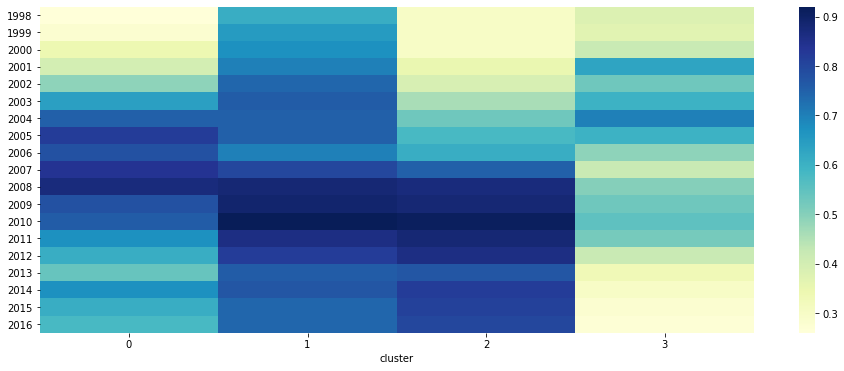

In [28]:
#Visualize the table to understand the buying behavor of different clusters
kmeans_avg = data_cluster.groupby(['cluster']).mean().round(2)

plt.subplots(figsize=(16, 6))
sns.heatmap(kmeans_avg.T, cmap = 'YlGnBu')
plt.show()

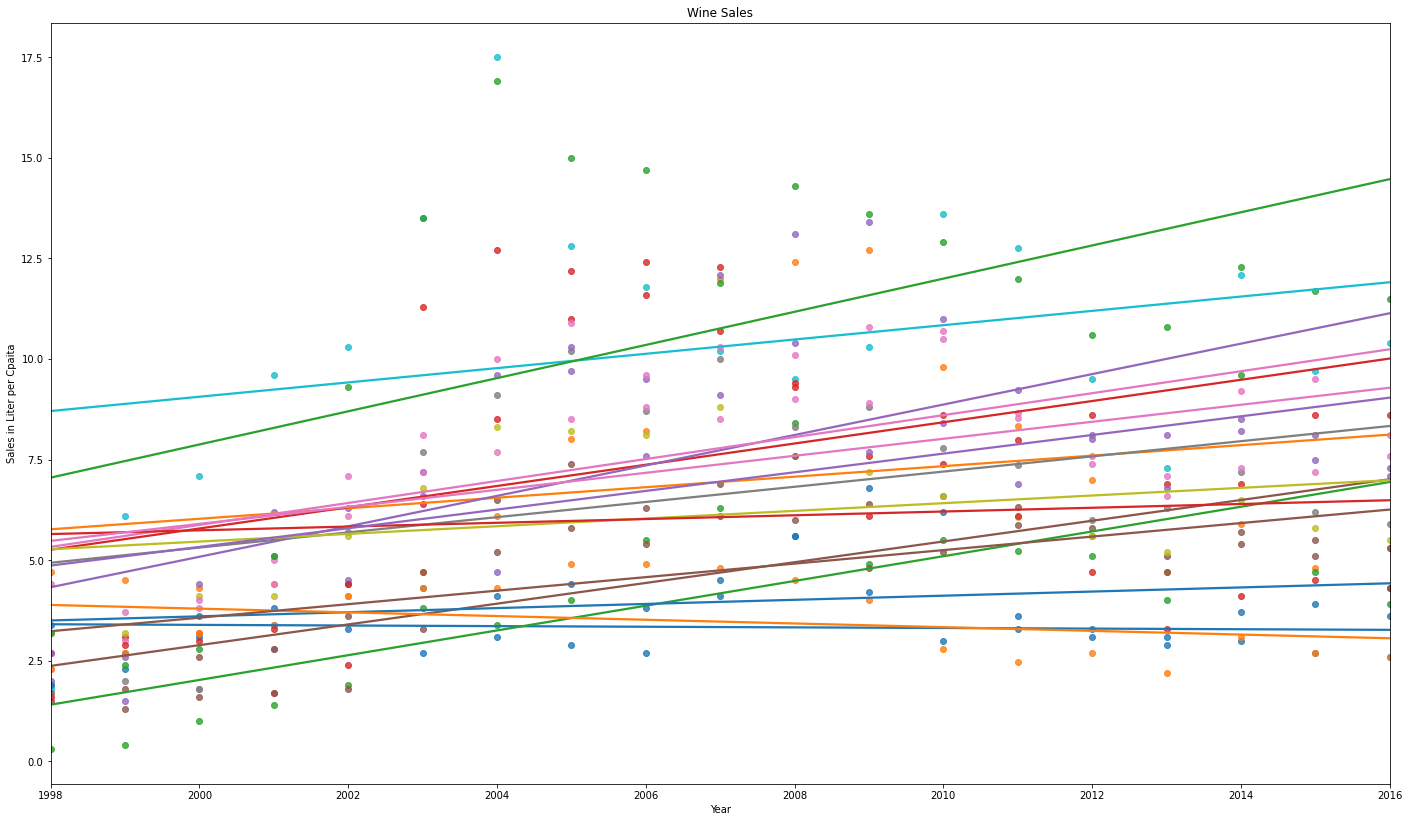

In [29]:
plt.subplots(figsize =(24,14))
for region in data_cluster_list:
    _ = sns.regplot(data=data_sales.loc[data_sales['region'] == region], x='year', y='wine', order=1, ci=False, label=region)

_.set_title('Wine Sales', y = 1)
_.set(xlabel = 'Year',ylabel = 'Sales in Liter per Cpaita')
plt.locator_params(axis="x", nbins=10)
plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show()

In [30]:
#Make a pivot table for actual sales of wine.
data_sales = data_sales.drop(['beer', 'vodka', 'champagne', 'brandy'], axis=1)
data_sales.dropna(subset = ["wine"], inplace=True)
data_sales_pivot = data_sales.pivot(index='region', columns='year', values='wine')
data_sales_pivot.head()



year                1998  1999  2000  2001  2002  2003  2004  2005  2006  \
region                                                                     
Altai Krai           3.3   2.2   2.1   2.3   1.6   1.7   2.0   2.0   2.2   
Altai Republic       3.4   4.8   5.4   5.7   5.7   6.4   6.7   6.0   4.0   
Amur Oblast          2.1   2.9   2.4   2.6   2.3   5.3   5.2   5.8   5.9   
Arkhangelsk Oblast   4.3   4.6   5.5   7.0   8.1   9.2   7.0   7.6   8.6   
Astrakhan Oblast     2.9   3.8   3.7   3.8   4.1   4.5   4.8   4.2   3.9   

year                2007  2008  2009  2010   2011  2012  2013  2014  2015  \
region                                                                      
Altai Krai           2.5   3.5   3.8   4.1   4.51   4.8   4.4   4.1   4.4   
Altai Republic       4.8   6.0   5.5   6.1   5.71   5.2   4.2   4.2   4.3   
Amur Oblast          5.7   6.5   6.9   7.6   7.21   5.8   6.7   6.1   6.0   
Arkhangelsk Oblast  10.1  10.7  11.3  12.0  12.23   9.2   9.2  10.7   9.0   
Astrakhan Oblast     4.1   5.0   5.9   6.1   4.92   4.7   4.2   5.1   4.7   

year                2016  
region                    
Altai Krai           4.8  
Altai Republic       4.5  
Amur Oblast          6.2  
Arkhangelsk Oblast   8.4  
Astrakhan Oblast     4.5

In [31]:
#Acquire the correlation coefficients and y-intercepts of the regions.
data_sales_pivot = data_sales_pivot.reset_index()
data_sales_pivot.columns.name = None

region_list = data_sales_pivot['region'].to_numpy()
lin_reg = LinearRegression()

reg_list=[]
intercept_list = []
for z in region_list:
    reg_df = data_sales[data_sales['region'] == z]
    X = reg_df[['year']]
    y = reg_df[['wine']]
    lin_reg.fit(X, y)
    reg_list.append(lin_reg.coef_)
    intercept_list.append(lin_reg.intercept_)

coef_list = np.array(reg_list).flatten()
intercept_list = np.array(intercept_list).flatten()
data_sales_pivot = data_sales_pivot.assign(coef=coef_list)
data_sales_pivot = data_sales_pivot.assign(inter=intercept_list)

#Calculate the average sales during the last three years.
data_sales_pivot['avg_wine_12-16'] = data_sales_pivot.iloc[:, 15:20].mean(axis=1).round(2)
data_sales_pivot.head()

region  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
0          Altai Krai   3.3   2.2   2.1   2.3   1.6   1.7   2.0   2.0   2.2   
1      Altai Republic   3.4   4.8   5.4   5.7   5.7   6.4   6.7   6.0   4.0   
2         Amur Oblast   2.1   2.9   2.4   2.6   2.3   5.3   5.2   5.8   5.9   
3  Arkhangelsk Oblast   4.3   4.6   5.5   7.0   8.1   9.2   7.0   7.6   8.6   
4    Astrakhan Oblast   2.9   3.8   3.7   3.8   4.1   4.5   4.8   4.2   3.9   

   ...  2010   2011  2012  2013  2014  2015  2016      coef       inter  \
0  ...   4.1   4.51   4.8   4.4   4.1   4.4   4.8  0.168667 -335.339789   
1  ...   6.1   5.71   5.2   4.2   4.2   4.3   4.5 -0.030807   67.019684   
2  ...   7.6   7.21   5.8   6.7   6.1   6.0   6.2  0.258491 -513.570316   
3  ...  12.0  12.23   9.2   9.2  10.7   9.0   8.4  0.287404 -568.148842   
4  ...   6.1   4.92   4.7   4.2   5.1   4.7   4.5  0.082246 -160.597474   

   avg_wine_12-16  
0            4.50  
1            4.48  
2            6.16  
3            9.30  
4            4.64  

[5 rows x 23 columns]

In [32]:
#Keep only correlation coefficients and sales.
data_cm = data_sales_pivot.copy(deep=True)
data_cm = data_cm[['region', 'coef', 'avg_wine_12-16']]
data_cm

region      coef  avg_wine_12-16
0                       Altai Krai  0.168667            4.50
1                   Altai Republic -0.030807            4.48
2                      Amur Oblast  0.258491            6.16
3               Arkhangelsk Oblast  0.287404            9.30
4                 Astrakhan Oblast  0.082246            4.64
..                             ...       ...             ...
79                  Vologda Oblast  0.154842            9.02
80                 Voronezh Oblast  0.273649            6.26
81  Yamalo-Nenets Autonomous Okrug  0.087930            5.24
82                Yaroslavl Oblast  0.453123            9.34
83                Zabaykalsky Krai  0.178035            6.52

[84 rows x 3 columns]

In [33]:
#Subset the correlation coefficients and sales into 3 levels.
data_cm['coef_level']=pd.qcut(data_cm['coef'].rank(method='first'), q=3, labels=range(1,4))
data_cm['avg_wine_level']=pd.qcut(data_cm['avg_wine_12-16'].rank(method='first'), q=3, labels=range(1,4))
data_cm.head()

region      coef  avg_wine_12-16 coef_level avg_wine_level
0          Altai Krai  0.168667            4.50          2              1
1      Altai Republic -0.030807            4.48          1              1
2         Amur Oblast  0.258491            6.16          2              2
3  Arkhangelsk Oblast  0.287404            9.30          3              3
4    Astrakhan Oblast  0.082246            4.64          1              1

In [34]:
#Give a final score by summing up the coefficients and sales levels
data_cm['score'] = data_cm[['coef_level', 'avg_wine_level']].sum(axis=1).astype(int)

def cm_level_func(df):
  if df['score'] >= 5:
    return 'Top'
  elif ((df['score'] >= 3) & (df['score'] < 5)):
    return 'Middle'
  else:
    return 'Low'
data_cm['cm_level'] = data_cm.apply(cm_level_func, axis=1)

data_cm.head()

region      coef  avg_wine_12-16 coef_level avg_wine_level  \
0          Altai Krai  0.168667            4.50          2              1   
1      Altai Republic -0.030807            4.48          1              1   
2         Amur Oblast  0.258491            6.16          2              2   
3  Arkhangelsk Oblast  0.287404            9.30          3              3   
4    Astrakhan Oblast  0.082246            4.64          1              1   

   score cm_level  
0      3   Middle  
1      2      Low  
2      4   Middle  
3      6      Top  
4      2      Low

In [35]:
#Add cluster labels into this data frame.
data_cluster_label = data_cluster[['region', 'cluster']]
data_label_scatter = data_cm.merge(data_cluster_label, how='inner', on = 'region')

#Review the number of regions at different levels.
print(data_label_scatter.groupby('cm_level').agg({'coef': 'mean', 'avg_wine_12-16': ['mean', 'count']}).round(2))
data_label_scatter

          coef avg_wine_12-16      
          mean           mean count
cm_level                           
Low      -0.01           3.48    20
Middle    0.15           5.56    27
Top       0.32           7.91    37


region      coef  avg_wine_12-16 coef_level  \
0                       Altai Krai  0.168667            4.50          2   
1                   Altai Republic -0.030807            4.48          1   
2                      Amur Oblast  0.258491            6.16          2   
3               Arkhangelsk Oblast  0.287404            9.30          3   
4                 Astrakhan Oblast  0.082246            4.64          1   
..                             ...       ...             ...        ...   
79                  Vologda Oblast  0.154842            9.02          2   
80                 Voronezh Oblast  0.273649            6.26          3   
81  Yamalo-Nenets Autonomous Okrug  0.087930            5.24          1   
82                Yaroslavl Oblast  0.453123            9.34          3   
83                Zabaykalsky Krai  0.178035            6.52          2   

   avg_wine_level  score cm_level  cluster  
0               1      3   Middle        2  
1               1      2      Low        1  
2               2      4   Middle        2  
3               3      6      Top        1  
4               1      2      Low        1  
..            ...    ...      ...      ...  
79              3      5      Top        3  
80              2      5      Top        2  
81              1      2      Low        1  
82              3      6      Top        2  
83              2      4   Middle        3  

[84 rows x 8 columns]

In [36]:
#Scatter plot shows the distribution of the regions in different clusters
data_label_scatter['cluster'] = data_label_scatter['cluster'].astype(str)
fig = px.scatter(data_label_scatter, x = 'coef', y='avg_wine_12-16', labels={
                     "coef": "Coeffiecient",
                     "avg_wine_12-16": "Average Wine Sales in Liter"
                 },
                 color='cluster', hover_data=['region'], color_discrete_map = {"0": "blue", "1": "orange", "2":"red", '3':'black'})
fig.show()

In [37]:
#Sort the top 10 regions by the score number
data_filtered = data_label_scatter[data_label_scatter['region'].isin(data_cluster_list)]
data_top10 = data_filtered.sort_values('score', ascending=False).head(10)
data_top10['region']

53          Republic of Karelia
21                 Kirov Oblast
28             Leningrad Oblast
68            Sverdlovsk Oblast
8     Chukotka Autonomous Okrug
14           Kaliningrad Oblast
45                 Pskov Oblast
60             Saint Petersburg
27                 Kursk Oblast
42                 Penza Oblast
Name: region, dtype: object

In [38]:
for row in range(0,10):
    print(data_top10.iloc[row].coef)

0.4123157894736842
0.3784561403508771
0.27291228070175433
0.21154385964912276
0.307578947368421
0.2640701754385965
0.17789473684210524
0.23192982456140346
0.25775438596491224
0.1889122807017543


In [39]:
#Visualize the distribution of the top 10 regions
fig=go.Figure()
fig.add_trace(
    go.Scatter(x=data_cm['coef'], y=data_cm['avg_wine_12-16'], name='All Regions', mode='markers', opacity=0.4)
)
fig.add_trace(
    go.Scatter(x=data_top10['coef'], y=data_top10['avg_wine_12-16'], name='Top 10 Regions', mode='markers')
)

special_cor = []
for row in range(0,10):
    special_cor.append({'x':str(data_top10.iloc[row].coef), 'y':str(data_top10.iloc[row]['avg_wine_12-16']), 'text':data_top10.iloc[row].region, 'textangle':-90, 'font':{'size':10, 'color':'green'}})


fig.update_layout({ 
    'annotations':special_cor, 
      'showlegend':True, 'legend':{'x':0.02, 'y':0.96, 'bgcolor':'rgb(246, 228, 129)'}
      })
fig.update_xaxes(
        title_text = "Coeffiecient",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Average Wine Sales in Liter",
        title_font = {"size": 16},
        title_standoff = 12)
fig.show()

In [40]:
#Group the table by regions and get the average sales during the last three years.
data_recent_group = data_recent.groupby('region').agg({'wine':'mean', 'beer':'mean', 'vodka':'mean', 'champagne':'mean', 'brandy':'mean'}).round(2)
data_recent_group

wine   beer  vodka  champagne  brandy
region                                                               
Altai Krai                      4.43  45.20   4.83       0.87    0.30
Altai Republic                  4.33  40.50   7.70       1.13    0.33
Amur Oblast                     6.10  53.87   7.00       1.53    0.53
Arkhangelsk Oblast              9.37  55.03  12.27       1.87    0.93
Astrakhan Oblast                4.77  46.20   5.00       0.93    0.63
...                              ...    ...    ...        ...     ...
Vologda Oblast                  9.03  45.23  10.10       1.17    0.60
Voronezh Oblast                 5.60  52.80   4.43       1.43    0.57
Yamalo-Nenets Autonomous Okrug  4.70  81.57   9.00       1.87    1.37
Yaroslavl Oblast                9.80  45.97   9.13       1.43    0.97
Zabaykalsky Krai                6.53  33.83   7.67       0.97    0.30

[83 rows x 5 columns]

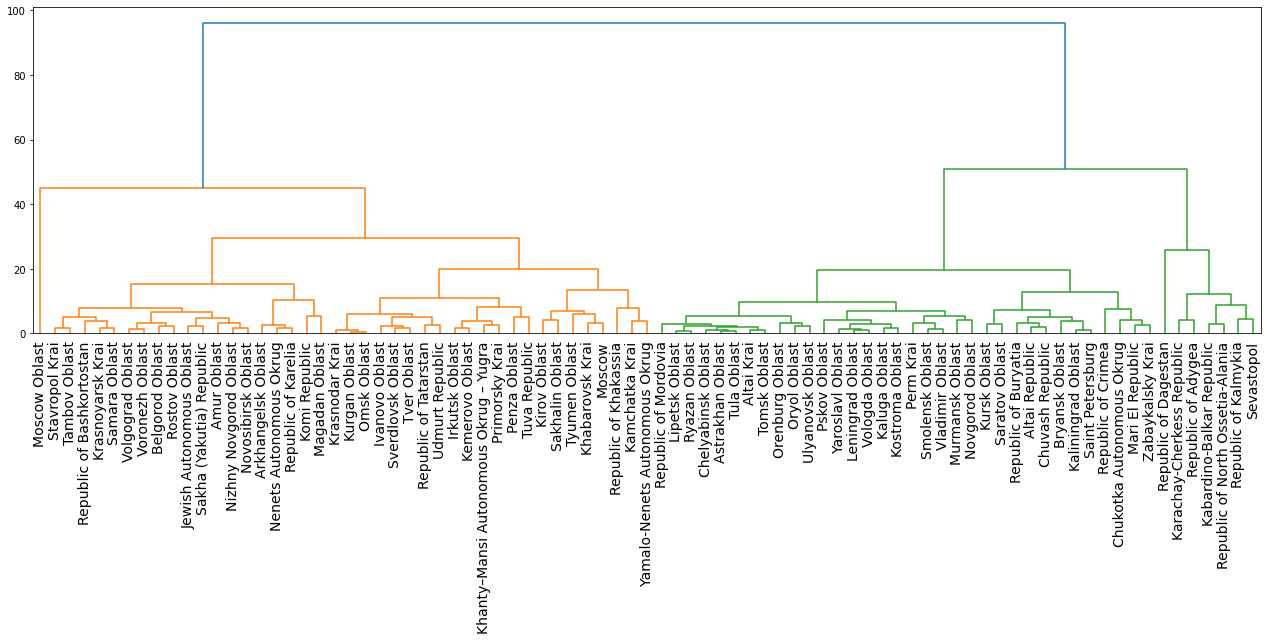

In [41]:
#Prepare the data for hierarchical clustering
data_features_recent = data_recent_group.iloc[:, 0:5].to_numpy()
data_index_recent = data_recent_group.index.to_numpy()

#Plot a dendrogram
plt.subplots(figsize=(22, 6))
hierarchy_recent = linkage(data_features_recent, method='complete')
dendrogram(hierarchy_recent, labels=data_index_recent, leaf_rotation=90, leaf_font_size=14)
plt.show()

In [42]:
#Split regions into 4 clusters.
recent_labels = fcluster(hierarchy_recent, 8, criterion='maxclust')
data_recent_hierarchy = data_recent_group.assign(hierarchy_cluster=recent_labels)
data_recent_hierarchy

wine   beer  vodka  champagne  brandy  \
region                                                                  
Altai Krai                      4.43  45.20   4.83       0.87    0.30   
Altai Republic                  4.33  40.50   7.70       1.13    0.33   
Amur Oblast                     6.10  53.87   7.00       1.53    0.53   
Arkhangelsk Oblast              9.37  55.03  12.27       1.87    0.93   
Astrakhan Oblast                4.77  46.20   5.00       0.93    0.63   
...                              ...    ...    ...        ...     ...   
Vologda Oblast                  9.03  45.23  10.10       1.17    0.60   
Voronezh Oblast                 5.60  52.80   4.43       1.43    0.57   
Yamalo-Nenets Autonomous Okrug  4.70  81.57   9.00       1.87    1.37   
Yaroslavl Oblast                9.80  45.97   9.13       1.43    0.97   
Zabaykalsky Krai                6.53  33.83   7.67       0.97    0.30   

                                hierarchy_cluster  
region                                             
Altai Krai                                      5  
Altai Republic                                  6  
Amur Oblast                                     1  
Arkhangelsk Oblast                              1  
Astrakhan Oblast                                5  
...                                           ...  
Vologda Oblast                                  5  
Voronezh Oblast                                 1  
Yamalo-Nenets Autonomous Okrug                  3  
Yaroslavl Oblast                                5  
Zabaykalsky Krai                                6  

[83 rows x 6 columns]

In [43]:
data_recent_hierarchy = data_recent_hierarchy.reset_index()
data_recent_hierarchy[data_recent_hierarchy['region']=='Saint Petersburg']

region  wine  beer  vodka  champagne  brandy  hierarchy_cluster
59  Saint Petersburg   7.8  37.2   6.97       2.37    1.27                  6

In [44]:
#Understand how many regions in cluster 3.
print(data_recent_hierarchy[data_recent_hierarchy['hierarchy_cluster'] == 6].shape)

(12, 7)


In [45]:
#Find the common regions as a priority in two different clustering results.
data_recent_list = data_recent_hierarchy.loc[data_recent_hierarchy['hierarchy_cluster'] == 6, 'region'].to_numpy()
top_10_list = data_top10['region'].to_numpy()

common_list=[]
not_in_list=[]
for z in top_10_list:
  if z in data_recent_list:
    common_list.append(z)
  else:
    not_in_list.append(z)
    
print('Top 10 Regions in both lists:', common_list)
print('Top 10 Regions not in the hierarchical cluster:', not_in_list)

Top 10 Regions in both lists: ['Chukotka Autonomous Okrug', 'Kaliningrad Oblast', 'Saint Petersburg', 'Kursk Oblast']
Top 10 Regions not in the hierarchical cluster: ['Republic of Karelia', 'Kirov Oblast', 'Leningrad Oblast', 'Sverdlovsk Oblast', 'Pskov Oblast', 'Penza Oblast']
